In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
sns.set() #default style for seaborn

from scipy import stats

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\XELFMARS\Downloads\ai4i2020.csv")
df.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


In [3]:
df.sample(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
8066,8067,L55246,L,300.4,311.9,1868,21.3,92,0,0,0,0,0,0
4479,4480,L51659,L,302.6,310.2,1923,21.5,18,0,0,0,0,0,0
4295,4296,L51475,L,301.8,310.2,1457,40.4,213,0,0,0,0,0,0
9529,9530,L56709,L,299.1,310.3,1459,46.7,84,0,0,0,0,0,0
253,254,L47433,L,298.0,308.2,1357,48.2,7,0,0,0,0,0,0
6561,6562,L53741,L,301.5,310.7,1596,35.4,150,0,0,0,0,0,0
7664,7665,H37078,H,300.5,311.7,1454,50.3,175,0,0,0,0,0,0
4271,4272,L51451,L,302.6,310.8,1470,41.2,156,0,0,0,0,0,0
4280,4281,L51460,L,302.1,310.1,1753,28.9,176,0,0,0,0,0,0
5736,5737,M20596,M,302.4,311.9,1439,36.6,212,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [5]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [6]:
df.shape

(10000, 14)

In [7]:
df.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df['Product ID'].value_counts()

Product ID
L57163    1
M24842    1
L57161    1
L57160    1
L57159    1
         ..
L47184    1
L47183    1
L47182    1
L47181    1
M14860    1
Name: count, Length: 10000, dtype: int64

This shows that the product id is only for identification also the needed column type has already been extracted from it
>The UID should also be dropped

## UNIVARIATE ANALYSIS

In [10]:
df['Machine failure'].value_counts()

Machine failure
0    9661
1     339
Name: count, dtype: int64

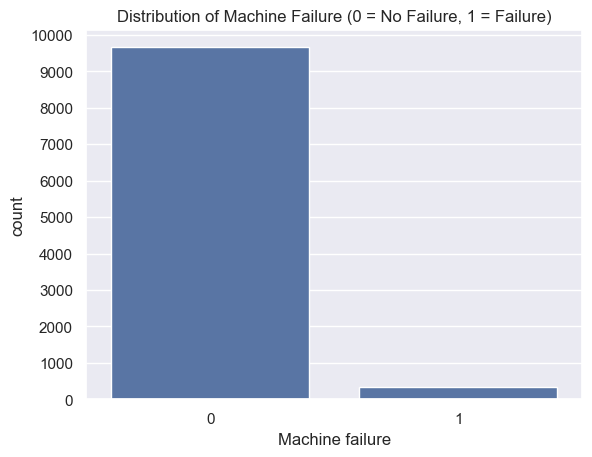

In [11]:
#Distribution of total machine failures and no failure
sns.countplot(x='Machine failure', data=df)
plt.title('Distribution of Machine Failure (0 = No Failure, 1 = Failure)')
plt.yticks(ticks=np.linspace(0,10000,11))
plt.show()

This shows that the target var is highly umbalanced

In [12]:
print(f'Total Failures : {df['Machine failure'].sum()} out of {df['Machine failure'].count()}')

Total Failures : 339 out of 10000


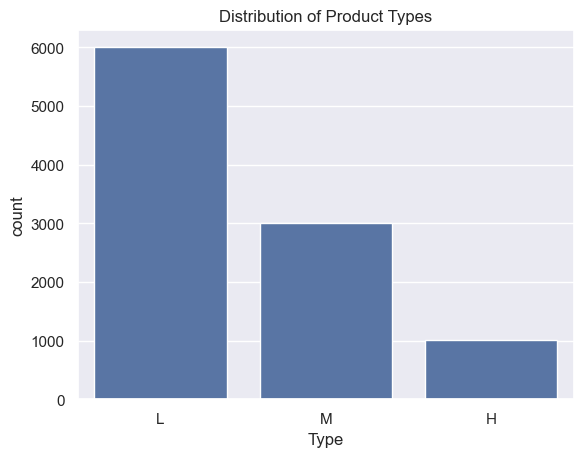

In [13]:
# Plot a bar chart for the categorical 'Type' feature

sns.countplot(x='Type', data=df, order=['L', 'M', 'H'])
plt.title('Distribution of Product Types')

plt.show()

This shows that 60percent of products fall under Low type, 30 percent under Medium and 10 percent under High as opposed to the 50/30/20 claim made on the variable information page

In [14]:
failure_df=df[df['Machine failure']==1]

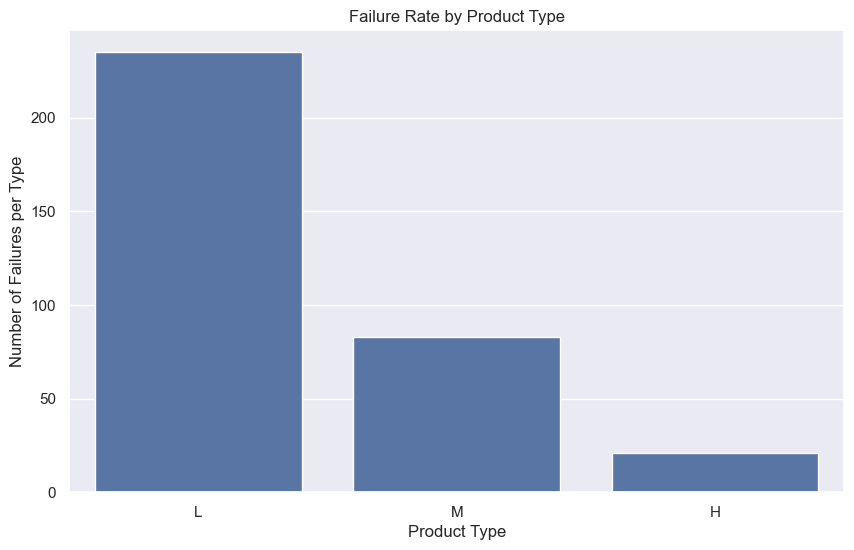

In [15]:
#Failure Rate by product type

plt.figure(figsize=(10, 6))
sns.countplot(data=failure_df,x='Type', order=['L', 'M', 'H'])
plt.title('Failure Rate by Product Type')
plt.ylabel('Number of Failures per Type')
plt.xlabel('Product Type')
plt.show()

In [16]:
#Distribution of all numerical variables

In [17]:
numerical_features = ['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

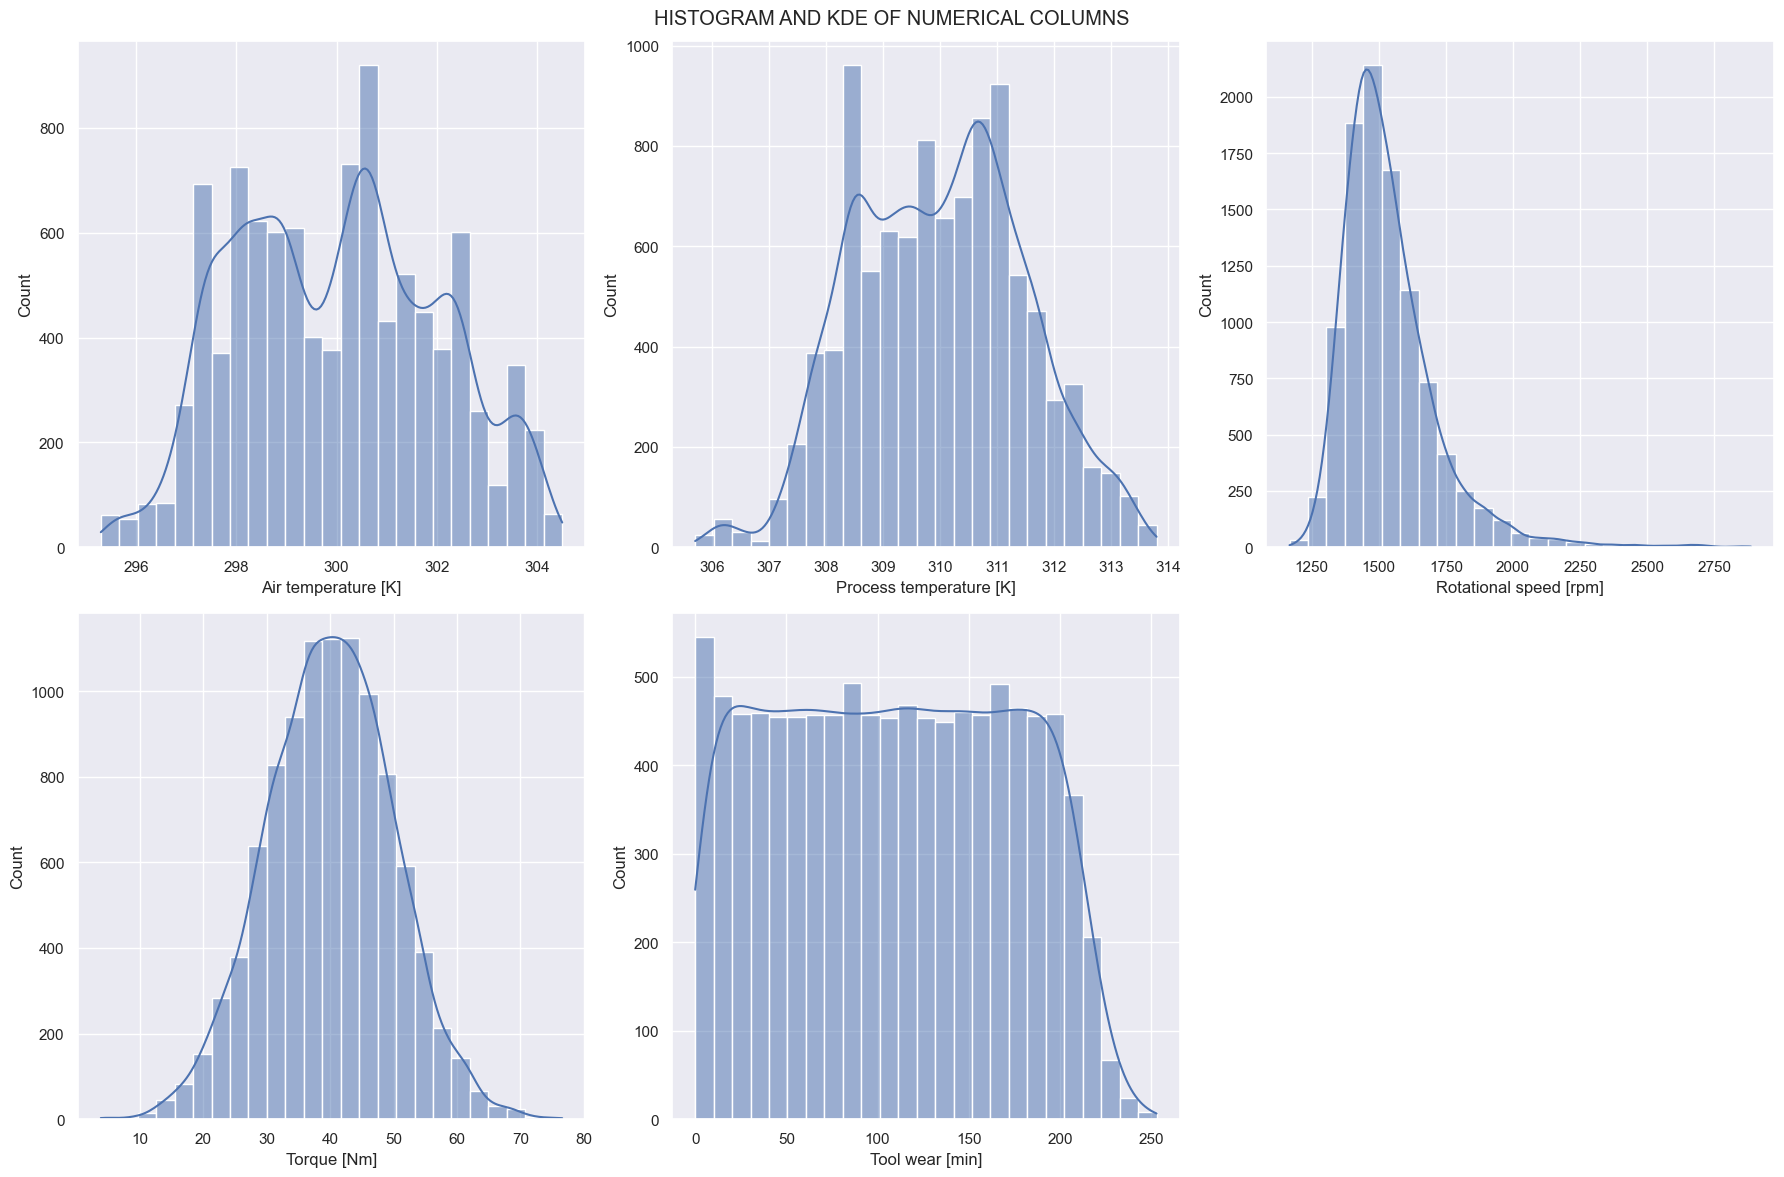

In [18]:
indexes=list(enumerate(numerical_features))

fig,ax=plt.subplots(2,3,figsize=(18, 12))
fig.suptitle('HISTOGRAM AND KDE OF NUMERICAL COLUMNS')
for index, cols in indexes:
    current_ax = ax.flat[index]
    sns.histplot(data=df,x=cols, bins=25, kde=True, ax=current_ax)
    ax.flat[5].set_visible(False)
    plt.tight_layout()
plt.show()

In [19]:
#observations
#only torque looks normally distributed, Rotational speed is skewed to the left(right tailed)
#Tool wear is approximately uniform, with a slight right tail indicating a few higher-end values
#Air temp and process temp look multimodal with several peaks and tails on both sides 

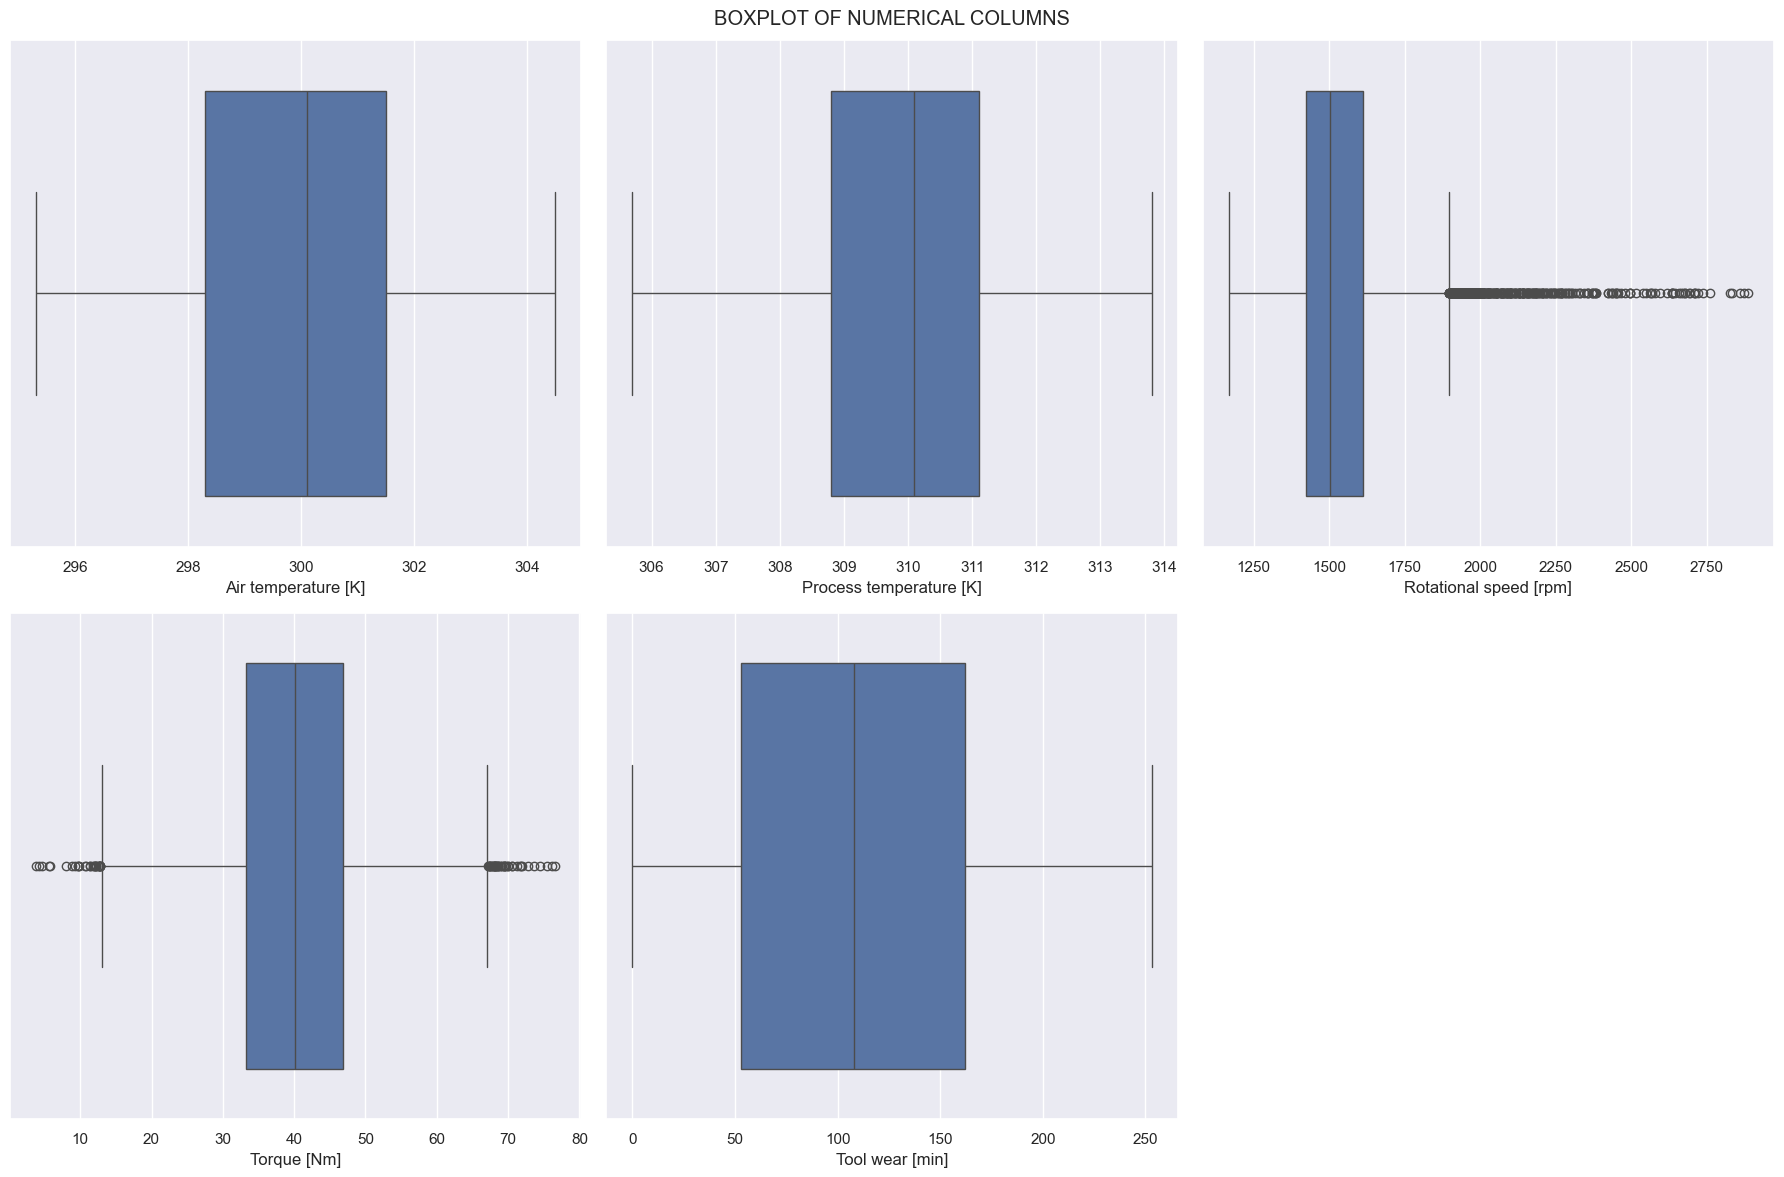

In [20]:
indexes=list(enumerate(numerical_features))

fig,ax=plt.subplots(2,3,figsize=(18, 12))
fig.suptitle('BOXPLOT OF NUMERICAL COLUMNS')
for index, cols in indexes:
    current_ax=ax.flat[index]
    sns.boxplot(data=df,x=cols, ax=current_ax)
    ax.flat[5].set_visible(False)
plt.tight_layout()
plt.show()

The Rotational speed and torque columns have a lot of outliers

##  Relationships Between Features and Machine Failure

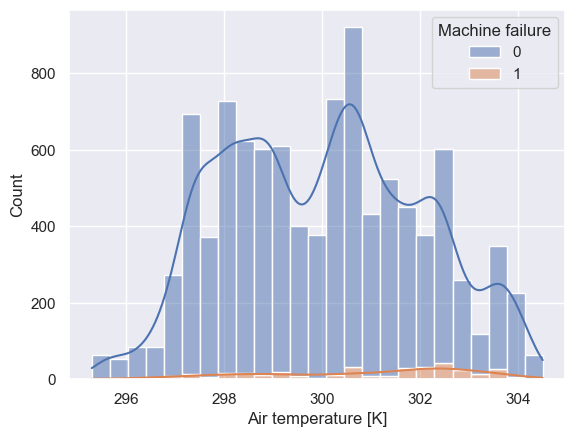

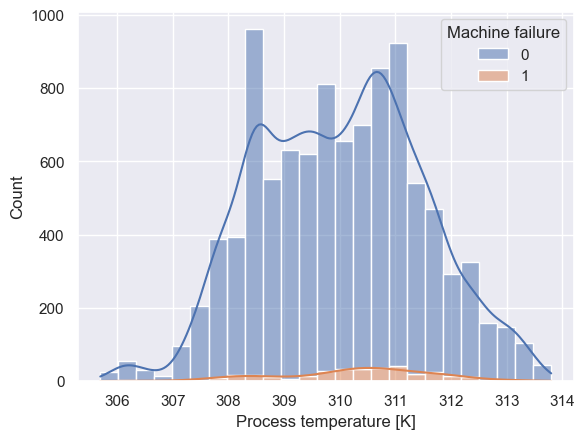

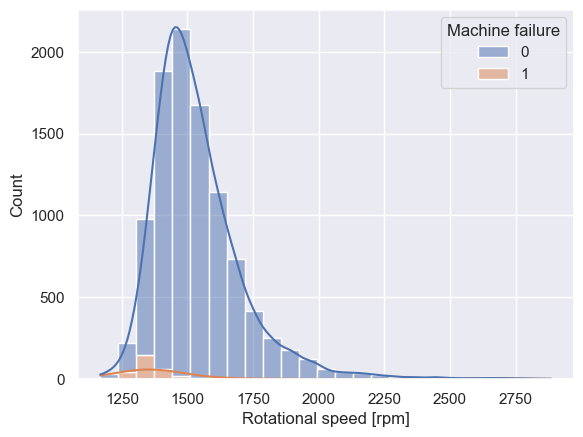

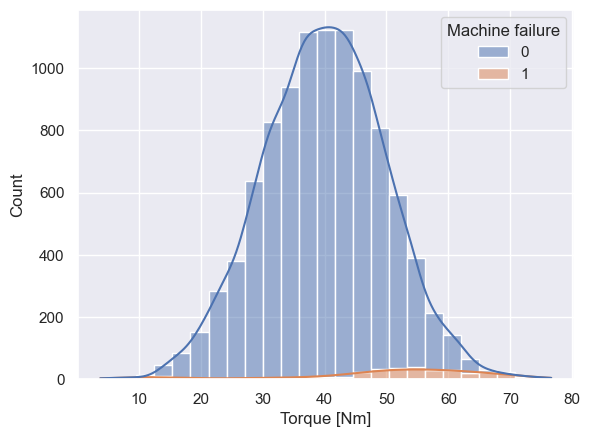

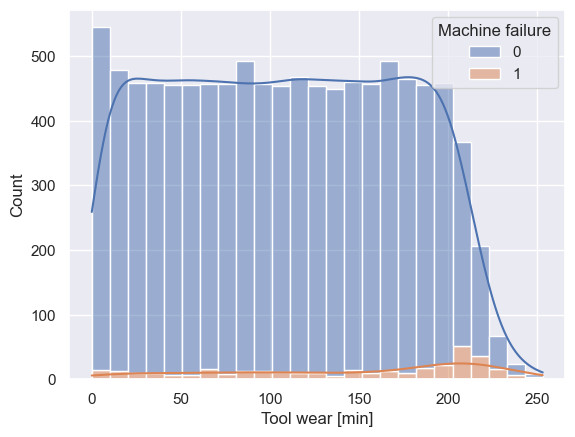

In [21]:
for cols in numerical_features:
    sns.histplot(data=df,x=cols, bins=25, kde=True, hue='Machine failure',multiple='stack')
    plt.show()

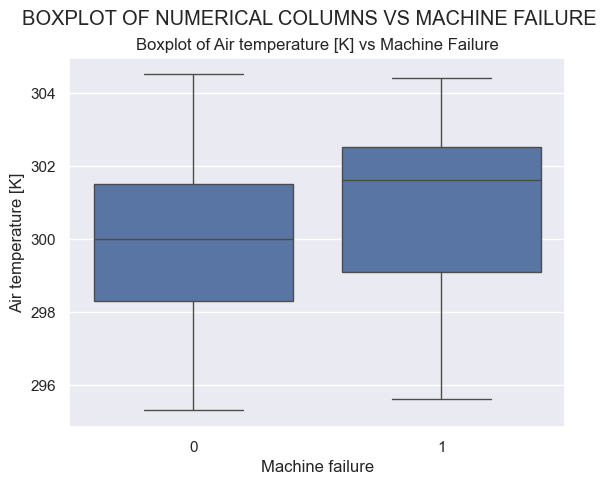

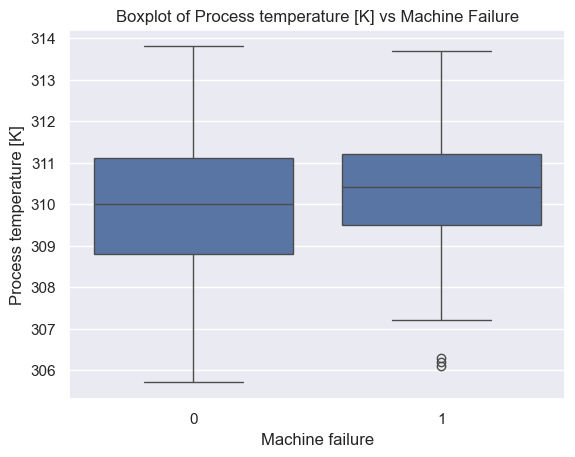

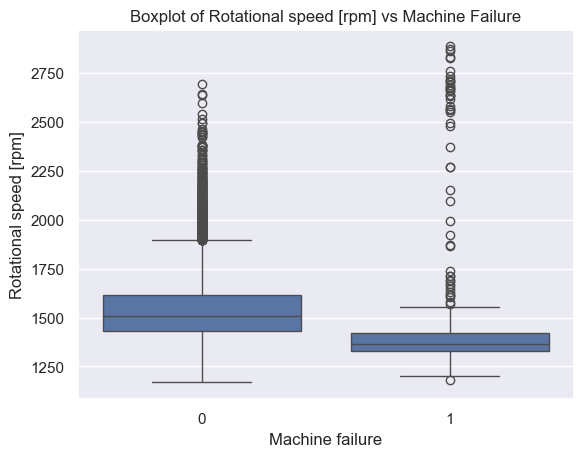

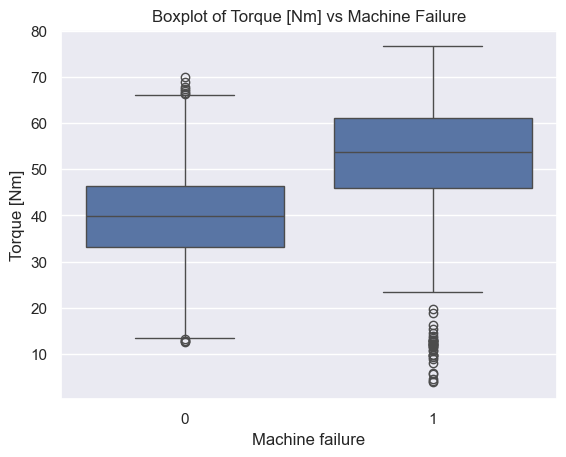

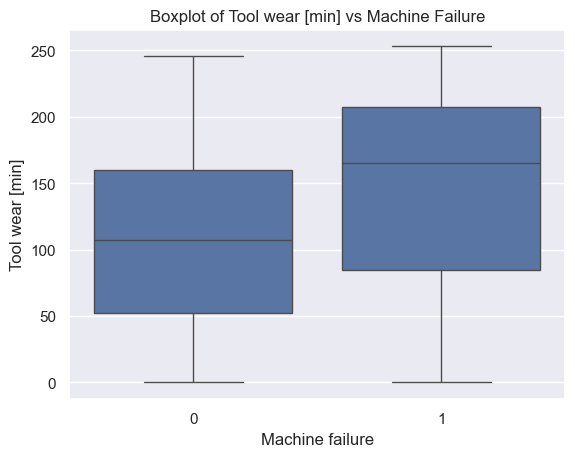

In [22]:
plt.suptitle('BOXPLOT OF NUMERICAL COLUMNS VS MACHINE FAILURE')
for cols in numerical_features:
    sns.boxplot(data=df, x=df['Machine failure'],y=cols)
    plt.title(f'Boxplot of {cols} vs Machine Failure')
    plt.show()

From the boxplots, we can see that the IQR for Failure in Torque and Rotational speed don't overlap , this signifies that the typical range of values for a failure is completely different from the typical range for a normal operation in the Two columns.

We can also see that in the torque, tool wear plots, the median is typically higher in failure than in no failure signifying that in these columns, failure usually occurs in high conditions relative to normal use.

For failure boxplots with extreme outliers compared to no failure, this means that the extreme outlier values directly lead to failure

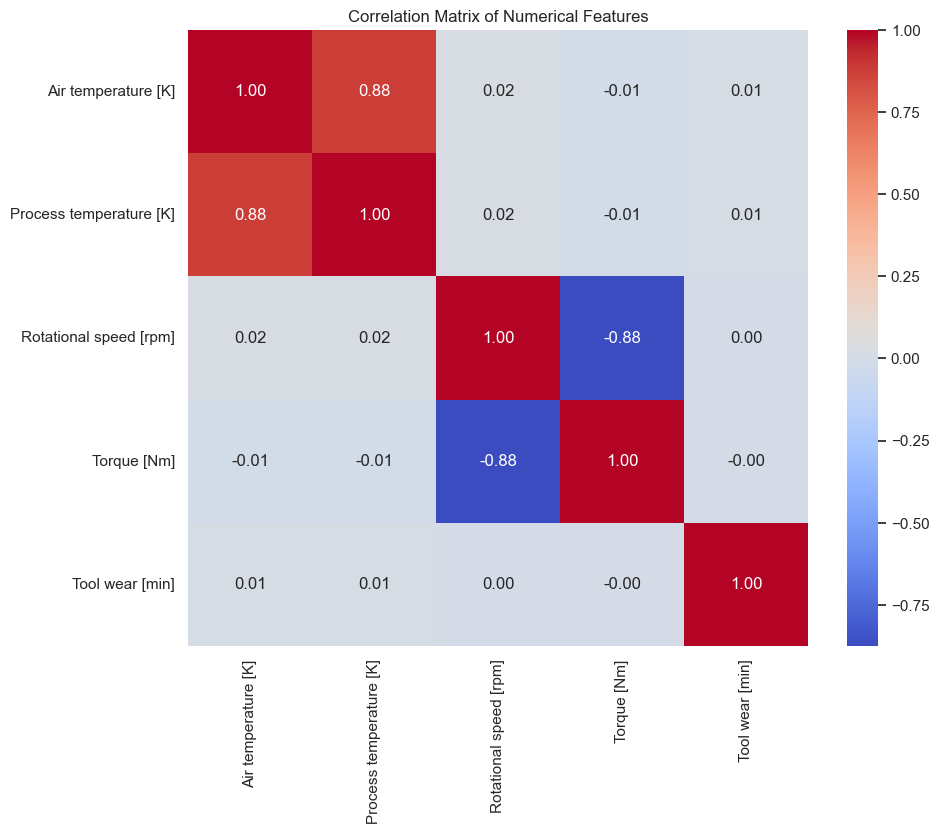

In [23]:
# Calculate the correlation matrix
corr_matrix = df[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Air temperature and Process temperature are highly positively correlated
Rotational speed and Torque have a high negative correlation

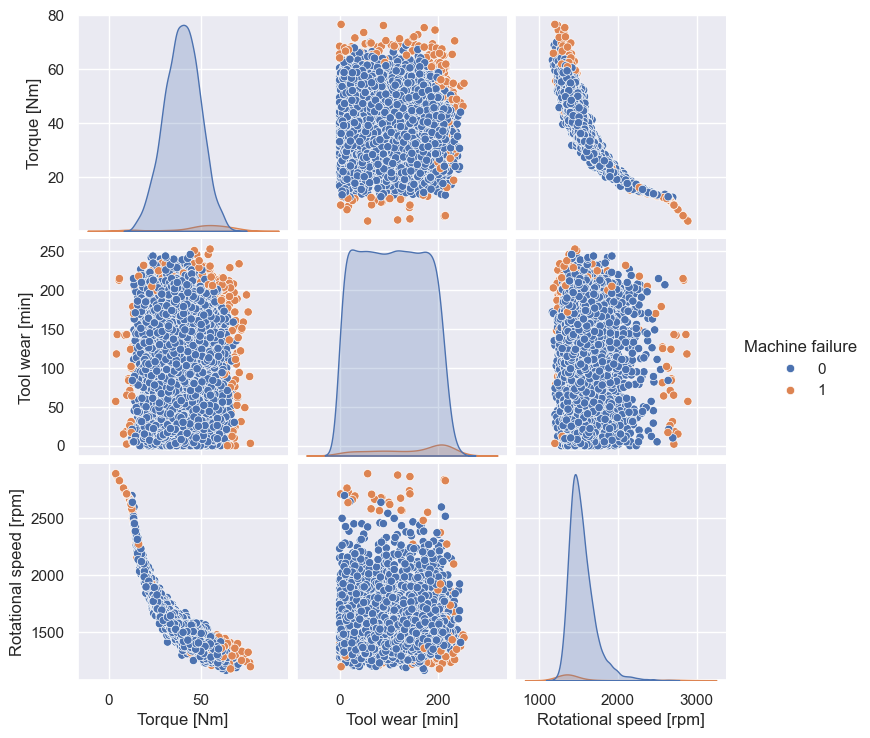

In [35]:
# Pairplot showing scatterplot between Torque , Tool Wear and Rotaional speeed
sns.pairplot(df, hue='Machine failure', vars=['Torque [Nm]', 'Tool wear [min]', 'Rotational speed [rpm]'])
plt.show()

#The Torque vs. Rotational speed scatterplot shows the distribution of PWF where the red failure dots are at the extreme corners of the plot, solidifying that outliers are directly linked to PWF
Tool wear vs. Torque has the red failure dots clustered in the top-right corner. This visually confirms the Overstrain Failure (OSF), where high tool wear and high torque cause a failure.

## Feature Engineering

From the additional variable analysis, some key features were noted out to determine method of failure, 
>They include Temperature Difference, Power and Overstrain Metric

In [24]:
#Temp Diff
df['TempDiff'] = df['Process temperature [K]'] - df['Air temperature [K]']

In [25]:
# Power
# Convert RPM to radians per second and calculate Power in Watts
df['Power [W]'] = df['Torque [Nm]'] * (df['Rotational speed [rpm]'] * 2 * np.pi / 60)

In [26]:
# Overstrain Metric 
df['OverstrainMetric'] = df['Tool wear [min]'] * df['Torque [Nm]']

In [27]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,TempDiff,Power [W],OverstrainMetric
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,10.5,6951.590560,0.0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,10.5,6826.722724,138.9
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,10.4,7749.387543,247.0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,10.4,5927.504659,276.5
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,10.5,5897.816608,360.0


In [28]:
new_numerical_features = ['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TempDiff','Power [W]','OverstrainMetric' ]

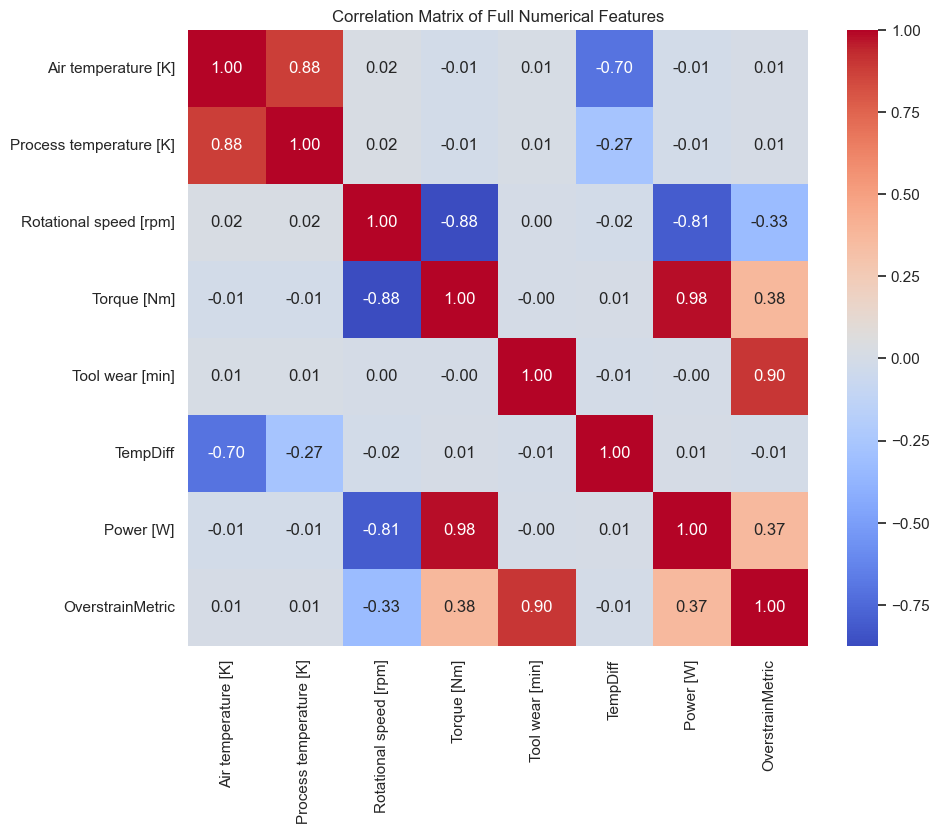

In [29]:
# Calculate the new correlation matrix with the added features
corr_matrix = df[new_numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Full Numerical Features')
plt.show()

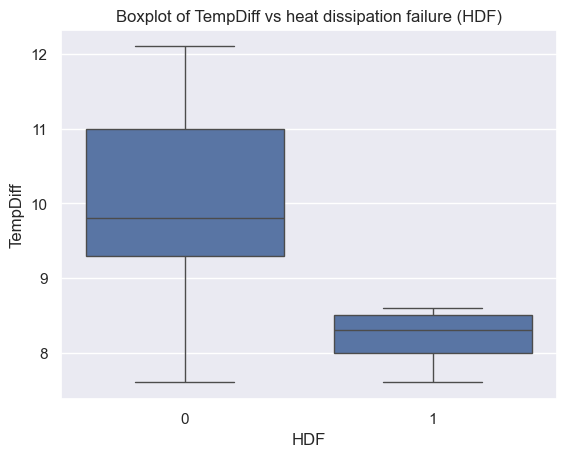

In [30]:
# Let us compare the new columns with the key failure modes they are expected to predict

sns.boxplot(data=df, x=df['HDF'],y=df['TempDiff'])
plt.title(f'Boxplot of TempDiff vs heat dissipation failure (HDF)')
plt.show()

The clear distinction between the boxplots of TEmpdiff based on heat dissipation failure (HDF) proves that Tempdiff is a major factor affecting the failure type, The failure class consists of only data below 9

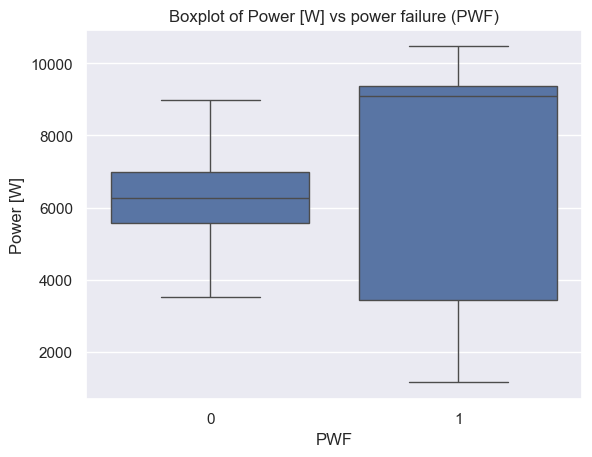

In [31]:
sns.boxplot(data=df, x=df['PWF'],y=df['Power [W]'])
plt.title(f'Boxplot of Power [W] vs power failure (PWF)')
plt.show()

This indicates that the failure due to power (PWF) is consisted of majorly outliers that are not in the range the normal cases

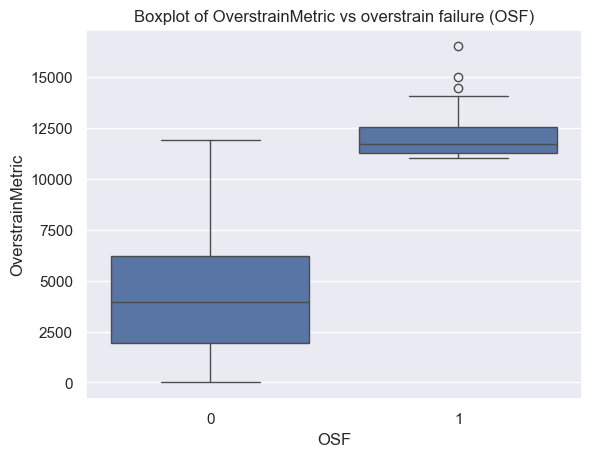

In [32]:
sns.boxplot(data=df, x=df['OSF'],y=df['OverstrainMetric'])
plt.title(f'Boxplot of OverstrainMetric vs overstrain failure (OSF)')
plt.show()

The clear distinction between the boxplots of OverStrainMetric based on overstrain failure (OSF) proves that OverStrainMetric is a major factor affecting the failure type, The failure class consists of only data above 11000

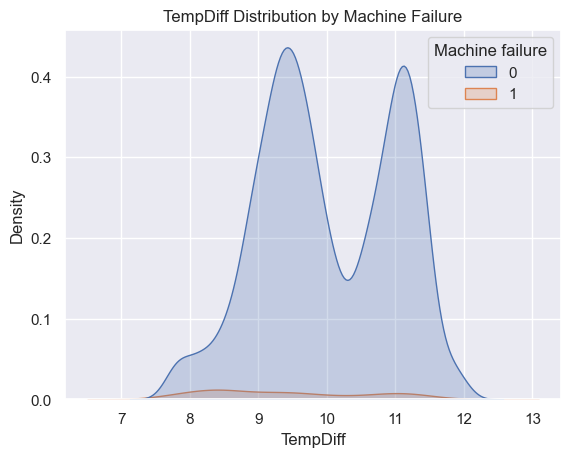

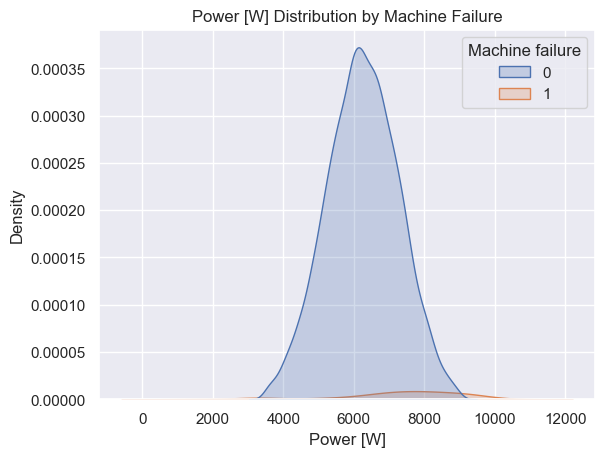

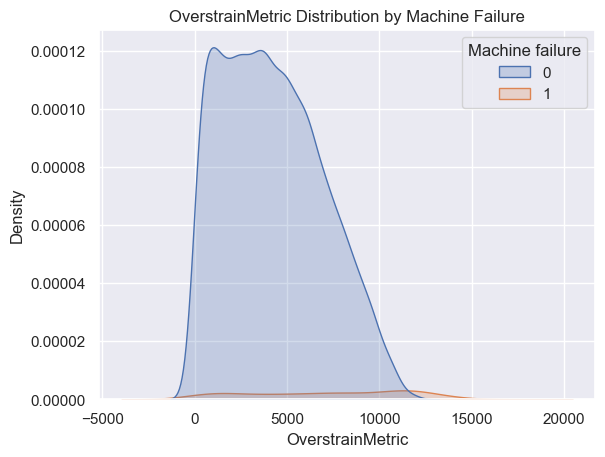

In [40]:
#KDE of new features showing dist of failures and non failures

new_features = ['TempDiff', 'Power [W]', 'OverstrainMetric']

for col in new_features:
    sns.kdeplot(data=df, x=col, hue='Machine failure', fill=True)
    plt.title(f"{col} Distribution by Machine Failure")
    plt.show()